In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from datetime import datetime

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## 2. Chargement et concaténation des datasets Automobile.tn Neuf

In [3]:
# Chemins des fichiers
data_dir = '../Data/row/'
files = [
    'automobile_tn_20251128_145956.csv',
    'automobile_tn_20251128_181328.csv',
    'automobile_tn_20251128_225422.csv',
    'automobile_tn_20251129_114711.csv',
    'automobile_tn_20251129_125022.csv'
]

# Charger tous les fichiers
dfs = []
for file in files:
    filepath = os.path.join(data_dir, file)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, encoding='utf-8-sig')
        print(f"✓ Chargé: {file} - {len(df)} lignes")
        dfs.append(df)
    else:
        print(f"⚠️ Fichier non trouvé: {file}")

# Concaténer tous les datasets
df_raw = pd.concat(dfs, ignore_index=True)

print(f"\n{'='*60}")
print(f"Total après concaténation: {len(df_raw)} voitures")
print(f"{'='*60}")

✓ Chargé: automobile_tn_20251128_145956.csv - 40 lignes
✓ Chargé: automobile_tn_20251128_181328.csv - 18 lignes
✓ Chargé: automobile_tn_20251128_225422.csv - 24 lignes
✓ Chargé: automobile_tn_20251129_114711.csv - 24 lignes
✓ Chargé: automobile_tn_20251129_125022.csv - 120 lignes

Total après concaténation: 226 voitures


In [4]:
# Afficher un aperçu des données brutes
print("Aperçu des données brutes:")
print(f"Colonnes disponibles: {list(df_raw.columns)}")
df_raw.head(10)

Aperçu des données brutes:
Colonnes disponibles: ['Modèle', 'Version', 'Prix', 'Promo', 'Ancien Prix', 'DISPONIBILITÉ', 'CARROSSERIE', 'GARANTIE', 'NOMBRE DE PLACES', 'NOMBRE DE PORTES', 'NOMBRE DE CYLINDRES', 'ENERGIE', 'PUISSANCE FISCALE', 'PUISSANCE (CH.DIN)', 'COUPLE', 'CYLINDRÉE', 'BOÎTE', 'NOMBRE DE RAPPORTS', 'TRANSMISSION', 'LONGUEUR', 'LARGEUR', 'HAUTEUR', 'VOLUME DU COFFRE', '0-100 KM/H', 'VITESSE MAXI', 'CONSOMMATION URBAINE', 'CONSOMMATION EXTRA-URBAINE', 'CONSOMMATION MIXTE', 'EMISSIONS DE CO2', 'AIRBAGS', 'ANTI-PATINAGE', 'BARRE STABILISATRICE', 'CALANDRE', 'ELÉMENTS EXTÉRIEURS COULEUR CARROSSERIE', 'FEUX À LED', 'JANTES', 'PHARES', 'AUTORADIO', 'CONNECTIVITÉ', 'ECRAN CENTRAL', 'ACCOUDOIRS', 'APPUIS TÊTES ARRIÈRES', 'KIT RANGEMENT', 'POMMEAU DE LEVIER DE VITESSE', 'SELLERIE', 'SIÈGES RÉGLABLES EN HAUTEUR', 'VITRES', 'VOLANT', 'VOLANT RÉGLABLE', 'CLIMATISATION', 'FERMETURE CENTRALISÉE', 'RÉTROVISEURS EXTÉRIEURS', 'VITRES ÉLECTRIQUES', 'URL', 'AIDE AU STATIONNEMENT', "BAGUE

,Modèle,Version,Prix,Promo,Ancien Prix,DISPONIBILITÉ,CARROSSERIE,GARANTIE,NOMBRE DE PLACES,NOMBRE DE PORTES,NOMBRE DE CYLINDRES,ENERGIE,PUISSANCE FISCALE,PUISSANCE (CH.DIN),COUPLE,CYLINDRÉE,BOÎTE,NOMBRE DE RAPPORTS,TRANSMISSION,LONGUEUR,LARGEUR,HAUTEUR,VOLUME DU COFFRE,0-100 KM/H,VITESSE MAXI,CONSOMMATION URBAINE,CONSOMMATION EXTRA-URBAINE,CONSOMMATION MIXTE,EMISSIONS DE CO2,AIRBAGS,ANTI-PATINAGE,BARRE STABILISATRICE,CALANDRE,ELÉMENTS EXTÉRIEURS COULEUR CARROSSERIE,FEUX À LED,JANTES,PHARES,AUTORADIO,CONNECTIVITÉ,ECRAN CENTRAL,ACCOUDOIRS,APPUIS TÊTES ARRIÈRES,KIT RANGEMENT,POMMEAU DE LEVIER DE VITESSE,SELLERIE,SIÈGES RÉGLABLES EN HAUTEUR,VITRES,VOLANT,VOLANT RÉGLABLE,CLIMATISATION,FERMETURE CENTRALISÉE,RÉTROVISEURS EXTÉRIEURS,VITRES ÉLECTRIQUES,URL,AIDE AU STATIONNEMENT,BAGUETTES EXTÉRIEURES D'ENCADREMENT DES VITRES,SEUILS DE PORTES,ALIMENTATION ÉLECTRIQUE,BARRES DE TOIT,DIFFÉRENTIEL AUTOBLOQUANT,DIRECTION ASSISTÉE,FINITION INTÉRIEURE,SIÈGES,BOUTON START & STOP,CLÉ INTELLIGENTE,FREIN DE STATIONNEMENT,INSTRUMENTATION DIGITALE,RÉTROVISEUR INTÉRIEUR,ALARME ANTIVOL,ASSISTANCE AU FREINAGE,NAVIGATION,NOMBRE DE MOTEURS ÉLECTRIQUES,BATTERIE,CHARGE UTILE,VOLUME UTILE,AUTONOMIE ÉLECTRIQUE (WLTP),TEMPS DE RECHARGE NORMALE (AC),AIDE AU DÉMARRAGE EN CÔTE,MODES DE CONDUITE,CONSOMMATION ÉLECTRIQUE (WLTP),RECONNAISSANCE DES PANNEAUX,PEINTURE,VOLUME DU COFFRE MAXIMAL,KIT SÉCURITÉ,SYSTÈME DE DESCENTE EN CÔTE,ORDINATEUR DE BORD,COFFRE À BAGAGES,TEMPS DE RECHARGE RAPIDE (DC),CONTRÔLE DE PRESSION DES PNEUS,ANTIBROUILLARDS,AUTONOMIE ÉLECTRIQUE (NEDC),RÉGULATEUR DE VITESSE,TAPIS DE SOL,TOIT,ALERTE DE RISQUE DE COLLISION,POIGNÉES DE PORTES,TYPE DE BATTERIE,ALERTE DE FRANCHISSEMENT DE LIGNE,AIDE AU MAINTIEN DANS LA VOIE,ALERTE DE CIRCULATION TRANSVERSALE,ASSISTANT DE FEUX DE ROUTE,CONDUITE AUTONOME,PUISSANCE ÉLECTRIQUE,COUPLE ÉLECTRIQUE,ARCEAU DE BENNE,MARCHEPIEDS LATÉRAUX,FREINAGE,PÉDALIERS,LUMIÈRES D'AMBIANCE,SPOILER ARRIÈRE,CONTRÔLE DE STABILITÉ ANTI-RETOURNEMENT,SORTIES D’ÉCHAPPEMENT,TABLEAU DE BORD,AFFICHAGE TÊTE HAUTE,KIT CARROSSERIE,PUISSANCE THERMIQUE (CH.DIN),SURVEILLANCE D’ANGLE MORT,VOLUME DU COFFRE AVANT,CAPACITÉ DE RECHARGE MAXIMALE (AC),CONTRÔLE DU ROULIS DE LA REMORQUE,LIMITEUR DE VITESSE,CONNECTED DRIVE,DÉTECTEUR DE FATIGUE,BOULE D'ATTELAGE,CAMÉRA D'ANGLE MORT,TRAIN ROULANT,SURFACE DE CHARGEMENT,CIEL DE PAVILLON,SUSPENSION,PORTES EN ÉLYTRE,STORES PARE-SOLEIL
0,SKODA FABIA,1.0 L MPI Essence,66 980 DT,Oui,68.980 DT,Disponible,Citadine,3 ans,5,5,3.0,Essence,4 CV,80 CH,93 nm 3700 tr/min,999 CM³,Manuelle,5.0,Traction,4108 mm,1780 mm,1482 mm,380 L,15.5 s,178 KM/H,6 L/100 km,4.3 L/100 km,5.1 L/100 km,116 g/km,Frontaux,ESP,Avant,Chromée,Pare-chocs | Poignées de portes | Rétroviseurs,Feux de jour,14'',LED,SWING | 4 haut-parleurs,2 USB-C | Bluetooth,Tactile | 6.5 pouces,Avant,3.0,Porte-lunettes,Cuir,Tissu,Conducteur,Athermiques,Multi-fonctions,En hauteur et en profondeur,Manuelle,À distance,Électriques | Dégivrants,Avant,https://www.automobile.tn/fr/neuf/skoda/fabia/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SKODA KUSHAQ,1.0 TSI Ambition,78 980 DT,Non,NaN,Sur arrivage,SUV,3 ans,5,5,3.0,Essence,6 CV,116 CH,178 nm 1750 tr/min,999 CM³,Manuelle,6.0,Traction,4221 mm,1760 mm,1612 mm,385 L,10.8 s,189 KM/H,6.7 L/100 km,4.5 L/100 km,5.2 L/100 km,NaN,Frontaux,ESP,NaN,NaN,Pare-chocs | Rétroviseurs,Avant,En aluminium | 16'',LED,6 haut-parleurs | Commandes au volant,2 USB-C | Android Auto | Apple Carplay | Bluet...,Tactile | 10 pouces,Avant | Arrière,3.0,Poches aumônières | Porte-lunettes,Cuir,Tissu,Conducteur,Athermiques,Cuir | Multi-fonctions,En hauteur et en profondeur,Automatique,À distance,Électriques | Rabattables,Avant/Arrière,https://www.automobile.tn/fr/neuf/skoda/kushaq...,Radar de r

In [5]:
# Informations sur le dataset
print("Informations sur le dataset:")
df_raw.info()

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Columns: 131 entries, Modèle to STORES PARE-SOLEIL
dtypes: float64(3), int64(1), object(127)
memory usage: 231.4+ KB


## 3. Suppression des doublons

In [6]:
# Supprimer les doublons basés sur l'URL
print(f"Nombre de doublons (URL): {df_raw.duplicated(subset=['URL']).sum()}")
df = df_raw.drop_duplicates(subset=['URL'], keep='first')
print(f"Dataset après suppression des doublons: {len(df)} voitures")

# Réinitialiser l'index
df = df.reset_index(drop=True)

Nombre de doublons (URL): 2
Dataset après suppression des doublons: 224 voitures


## 4. Extraction de la marque depuis la colonne 'Modèle'

In [7]:
# Extraire la marque (premier mot du modèle)
def extract_brand(modele):
    if pd.isna(modele) or modele == 'N/A':
        return 'Unknown'
    brand = str(modele).split()[0]
    return brand.strip()

df['Marque'] = df['Modèle'].apply(extract_brand)

# Standardisation des noms de marques
def standardize_brand(brand):
    corrections = {
        'Bmw': 'BMW',
        'Mg': 'MG',
        'Gwm': 'GWM',
        'Byd': 'BYD',
        'Ds': 'DS',
        'Volkswagen': 'VW'
    }
    return corrections.get(brand, brand)

df['Marque'] = df['Marque'].apply(standardize_brand)

print("Distribution des marques (APRÈS STANDARDISATION):")
print(df['Marque'].value_counts())

Distribution des marques (APRÈS STANDARDISATION):
Marque
HYUNDAI          17
PEUGEOT          12
TOYOTA           11
MG                9
KIA               9
HONDA             8
GWM               8
BMW               8
GEELY             8
DFSK              7
MERCEDES-BENZ     7
RENAULT           7
VOLKSWAGEN        6
CITROËN           6
MINI              6
SUZUKI            6
SKODA             6
FIAT              5
AUDI              5
OPEL              5
CHERY             5
BYD               5
DACIA             4
SEAT              4
DONGFENG          4
MAHINDRA          4
TATA              4
SSANGYONG         4
NISSAN            3
VOLVO             3
JETOUR            3
GAC               3
FAW               3
CHANGAN           3
WALLYSCAR         2
FORD              2
AVANTIER          2
OMODA             2
JMC               2
CUPRA             2
CENNTRO           2
JEEP              1
ALFA              1
Name: count, dtype: int64


## 5. Nettoyage de la colonne 'Prix'

In [8]:
# Fonction pour nettoyer le prix (utiliser 'Prix' pas 'Ancien Prix')
def clean_price(price):
    if pd.isna(price) or price == 'N/A':
        return np.nan
    # Enlever 'DT', espaces, virgules, "à partir de" et convertir en nombre
    price_str = str(price).replace('à partir de', '').replace('DT', '').replace(',', '').replace(' ', '').strip()
    try:
        return float(price_str)
    except:
        return np.nan

df['Prix_Numeric'] = df['Prix'].apply(clean_price)

print(f"Prix - Valeurs manquantes: {df['Prix_Numeric'].isna().sum()}")
print(f"Prix - Statistiques:")
print(df['Prix_Numeric'].describe())

Prix - Valeurs manquantes: 9
Prix - Statistiques:
count       215.000000
mean     123983.000000
std       53593.369705
min       28700.000000
25%       85000.000000
50%      114950.000000
75%      159900.000000
max      249980.000000
Name: Prix_Numeric, dtype: float64


## 6. Nettoyage de 'PUISSANCE FISCALE'

In [9]:
# Fonction pour nettoyer la puissance fiscale
def clean_power(power):
    if pd.isna(power) or power == 'N/A':
        return np.nan
    
    power_str = str(power).upper().strip()
    
    # Enlever 'CV', espaces
    power_str = power_str.replace('CV', '').replace(' ', '').strip()
    
    # Essayer d'extraire un nombre
    try:
        return float(power_str)
    except:
        # Essayer d'extraire avec regex
        match = re.search(r'(\d+\.?\d*)', power_str)
        if match:
            return float(match.group(1))
        return np.nan

df['Puissance_Numeric'] = df['PUISSANCE FISCALE'].apply(clean_power)

print(f"Puissance - Valeurs manquantes: {df['Puissance_Numeric'].isna().sum()}")
print(f"\nDistribution de la puissance:")
print(df['Puissance_Numeric'].value_counts().sort_index())

Puissance - Valeurs manquantes: 3

Distribution de la puissance:
Puissance_Numeric
2.0      3
3.0      5
4.0     17
5.0     29
6.0     29
7.0     33
8.0     44
9.0     34
10.0     9
11.0    11
12.0     1
13.0     1
14.0     5
Name: count, dtype: int64


## 7. Standardisation de la colonne 'ENERGIE'

In [10]:
# Standardisation de la colonne ENERGIE
def standardize_energie(energie):
    if pd.isna(energie):
        return 'Autre'
    
    energie_str = str(energie).lower().strip()
    
    if 'essence' in energie_str and 'hybride' not in energie_str:
        return 'Essence'
    elif 'diesel' in energie_str:
        return 'Diesel'
    elif 'electrique' in energie_str or 'électrique' in energie_str:
        return 'Electrique'
    elif 'hybride' in energie_str:
        return 'Hybride'
    else:
        return 'Autre'

df['Énergie'] = df['ENERGIE'].apply(standardize_energie)

print("="*60)
print("Distribution - Énergie (APRÈS STANDARDISATION):")
print("="*60)
print(df['Énergie'].value_counts())
print(f"\nValeurs uniques: {df['Énergie'].nunique()}")

Distribution - Énergie (APRÈS STANDARDISATION):
Énergie
Essence       122
Diesel         50
Hybride        28
Electrique     24
Name: count, dtype: int64

Valeurs uniques: 4


## 8. Standardisation de 'BOÎTE'

In [11]:
# Standardiser la boîte de vitesses
def standardize_transmission(boite):
    if pd.isna(boite):
        return 'Unknown'
    
    boite_str = str(boite).lower().strip()
    
    if 'automatique' in boite_str or 'bva' in boite_str or 'dsg' in boite_str:
        return 'Automatique'
    elif 'manuelle' in boite_str:
        return 'Manuelle'
    else:
        return 'Unknown'

df['Boîte_Vitesses'] = df['BOÎTE'].apply(standardize_transmission)

print("Distribution - Boîte de vitesse:")
print(df['Boîte_Vitesses'].value_counts())

Distribution - Boîte de vitesse:
Boîte_Vitesses
Automatique    137
Manuelle        86
Unknown          1
Name: count, dtype: int64


## 9. Créer la colonne 'Modele' (Modèle + Version)

In [12]:
# Créer la colonne Modele en combinant Modèle et Version
def create_modele(row):
    modele = str(row['Modèle']) if pd.notna(row['Modèle']) else ''
    version = str(row['Version']) if pd.notna(row['Version']) else ''
    
    if modele and version and version != 'nan':
        return f"{modele} {version}"
    elif modele:
        return modele
    else:
        return 'Unknown'

df['Modele'] = df.apply(create_modele, axis=1)

print("✓ Colonne Modele créée")
print("\nExemples de modèles:")
print(df['Modele'].head(10))

✓ Colonne Modele créée

Exemples de modèles:
0                        SKODA FABIA 1.0 L MPI Essence
1                        SKODA KUSHAQ 1.0 TSI Ambition
2                    SKODA SCALA 1.0 L TSI Essence DSG
3                    SKODA KAMIQ 1.0 L TSI Essence DSG
4                    SKODA OCTAVIA 1.4 TSI Essence BVA
5                     SKODA SUPERB 1.5 TSI Essence DSG
6           AVANTIER AVANTIER C\n14 KWH Version unique
7    SUZUKI CELERIO POPULAIRE\n1.0 L GL Version unique
8         RENAULT KWID POPULAIRE\n1.0 L Version unique
9          KIA PICANTO POPULAIRE\n1.0 L Version unique
Name: Modele, dtype: object


## 10. Définir les valeurs fixes pour voitures neuves

In [13]:
# Pour les voitures neuves: Kilométrage=0, Année=2025, Age=0
df['Kilométrage'] = 0
df['Année'] = 2025
df['Age'] = 0

print("✓ Valeurs fixes définies pour voitures neuves:")
print(f"  - Kilométrage: 0 km")
print(f"  - Année: 2025")
print(f"  - Age: 0 ans")

✓ Valeurs fixes définies pour voitures neuves:
  - Kilométrage: 0 km
  - Année: 2025
  - Age: 0 ans


## 11. Analyse des valeurs manquantes

In [14]:
# Colonnes importantes à analyser
important_cols = ['Marque', 'Prix_Numeric', 'Kilométrage', 'Année', 
                  'Puissance_Numeric', 'Énergie', 'Boîte_Vitesses', 'Age']

# Calculer les valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': important_cols,
    'Valeurs manquantes': [df[col].isna().sum() for col in important_cols],
    'Pourcentage': [df[col].isna().sum() / len(df) * 100 for col in important_cols]
})

missing_data = missing_data.sort_values('Pourcentage', ascending=False)
print("Analyse des valeurs manquantes:")
print(missing_data.to_string(index=False))

Analyse des valeurs manquantes:
          Colonne  Valeurs manquantes  Pourcentage
     Prix_Numeric                   9     4.017857
Puissance_Numeric                   3     1.339286
           Marque                   0     0.000000
      Kilométrage                   0     0.000000
            Année                   0     0.000000
          Énergie                   0     0.000000
   Boîte_Vitesses                   0     0.000000
              Age                   0     0.000000


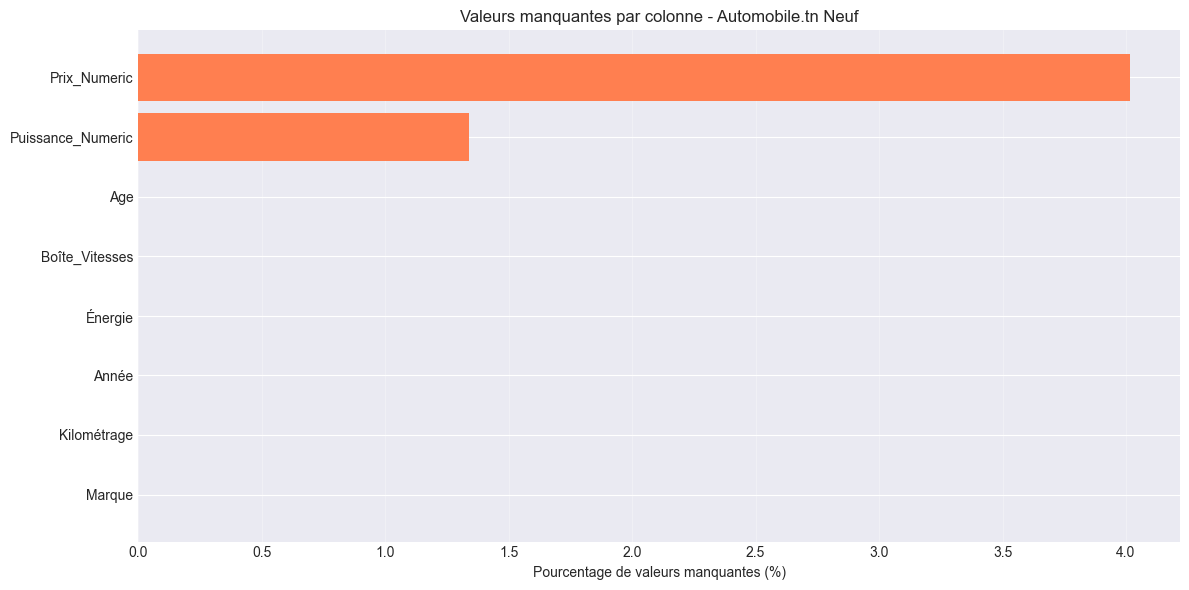

In [15]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
missing_data_sorted = missing_data.sort_values('Pourcentage')
plt.barh(missing_data_sorted['Colonne'], missing_data_sorted['Pourcentage'], color='coral')
plt.xlabel('Pourcentage de valeurs manquantes (%)')
plt.title('Valeurs manquantes par colonne - Automobile.tn Neuf')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 11b. Visualisation des variables catégorielles

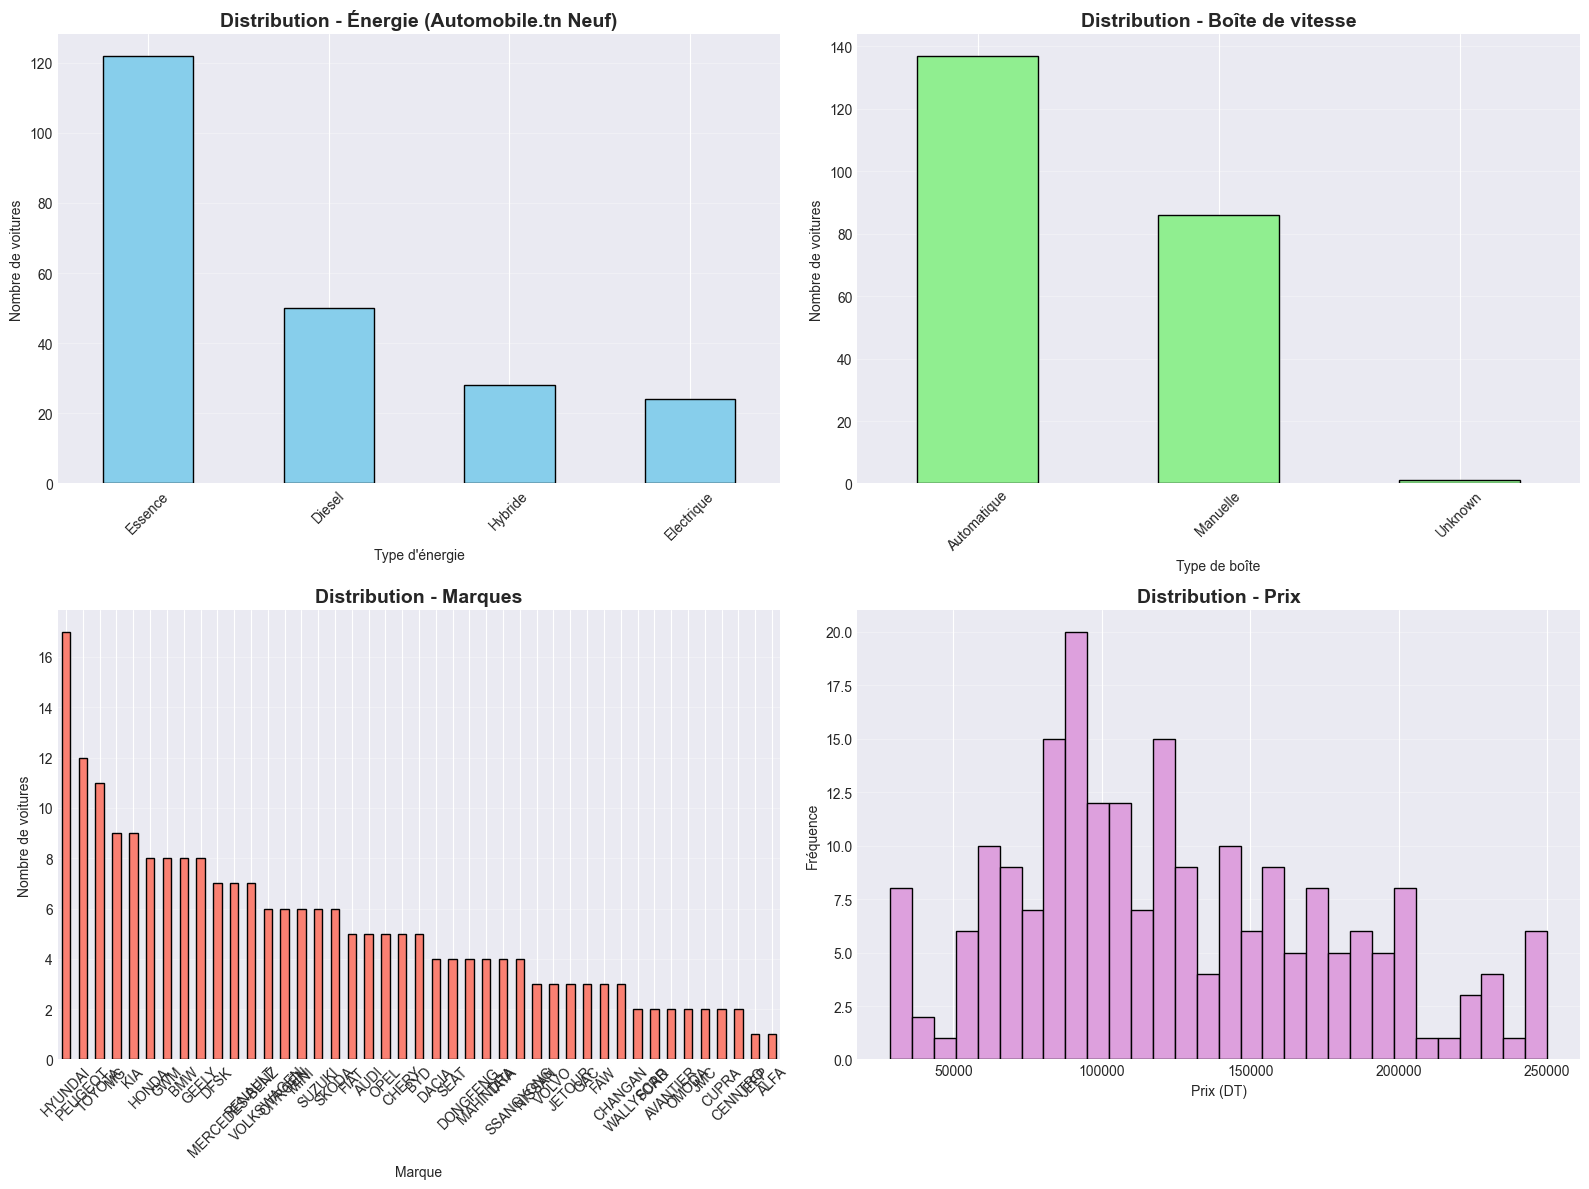


STATISTIQUES DES VARIABLES CATÉGORIELLES

Énergie - 4 types:
Énergie
Essence       122
Diesel         50
Hybride        28
Electrique     24
Name: count, dtype: int64

Boîte de vitesse - 3 types:
Boîte_Vitesses
Automatique    137
Manuelle        86
Unknown          1
Name: count, dtype: int64

Marque - 43 marques différentes
Toutes les marques:
Marque
HYUNDAI          17
PEUGEOT          12
TOYOTA           11
MG                9
KIA               9
HONDA             8
GWM               8
BMW               8
GEELY             8
DFSK              7
MERCEDES-BENZ     7
RENAULT           7
VOLKSWAGEN        6
CITROËN           6
MINI              6
SUZUKI            6
SKODA             6
FIAT              5
AUDI              5
OPEL              5
CHERY             5
BYD               5
DACIA             4
SEAT              4
DONGFENG          4
MAHINDRA          4
TATA              4
SSANGYONG         4
NISSAN            3
VOLVO             3
JETOUR            3
GAC               3
FAW  

In [16]:
# Visualisation graphique des variables catégorielles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Énergie
df['Énergie'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution - Énergie (Automobile.tn Neuf)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Nombre de voitures')
axes[0, 0].set_xlabel('Type d\'énergie')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Boîte de vitesse
df['Boîte_Vitesses'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution - Boîte de vitesse', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Nombre de voitures')
axes[0, 1].set_xlabel('Type de boîte')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Marque (toutes les marques car dataset petit)
df['Marque'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('Distribution - Marques', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Nombre de voitures')
axes[1, 0].set_xlabel('Marque')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Distribution des prix
df['Prix_Numeric'].hist(bins=30, ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution - Prix', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].set_xlabel('Prix (DT)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des variables catégorielles
print("\n" + "="*60)
print("STATISTIQUES DES VARIABLES CATÉGORIELLES")
print("="*60)
print(f"\nÉnergie - {df['Énergie'].nunique()} types:")
print(df['Énergie'].value_counts())
print(f"\nBoîte de vitesse - {df['Boîte_Vitesses'].nunique()} types:")
print(df['Boîte_Vitesses'].value_counts())
print(f"\nMarque - {df['Marque'].nunique()} marques différentes")
print(f"Toutes les marques:")
print(df['Marque'].value_counts())

## 12. Suppression des lignes sans prix

In [17]:
# Supprimer les lignes où le prix est manquant
print(f"Avant suppression: {len(df)} voitures")
df_clean = df.dropna(subset=['Prix_Numeric']).copy()
print(f"Après suppression (prix manquant): {len(df_clean)} voitures")
print(f"Voitures supprimées: {len(df) - len(df_clean)}")

Avant suppression: 224 voitures
Après suppression (prix manquant): 215 voitures
Voitures supprimées: 9


## 13. Imputation des valeurs manquantes

In [18]:
# Imputation de la puissance par la médiane groupée par marque
df_clean['Puissance_Numeric'] = df_clean.groupby('Marque')['Puissance_Numeric'].transform(
    lambda x: x.fillna(x.median())
)

# Si toujours des NaN, utiliser la médiane globale
global_median_power = df_clean['Puissance_Numeric'].median()
df_clean['Puissance_Numeric'] = df_clean['Puissance_Numeric'].fillna(global_median_power)

print(f"✓ Puissance - Valeurs manquantes après imputation: {df_clean['Puissance_Numeric'].isna().sum()}")

✓ Puissance - Valeurs manquantes après imputation: 0


In [19]:
# Imputation des variables catégorielles
df_clean['Énergie'] = df_clean['Énergie'].fillna('Unknown')
df_clean['Boîte_Vitesses'] = df_clean['Boîte_Vitesses'].fillna('Unknown')

print("✓ Variables catégorielles - Imputation terminée")

✓ Variables catégorielles - Imputation terminée


## 14. Distribution des variables numériques

In [20]:
# Statistiques descriptives
numeric_cols = ['Prix_Numeric', 'Kilométrage', 'Année', 'Puissance_Numeric', 'Age']
print("Statistiques descriptives:")
print(df_clean[numeric_cols].describe())

Statistiques descriptives:
        Prix_Numeric  Kilométrage   Année  Puissance_Numeric    Age
count     215.000000        215.0   215.0         215.000000  215.0
mean   123983.000000          0.0  2025.0           7.344186    0.0
std     53593.369705          0.0     0.0           2.288258    0.0
min     28700.000000          0.0  2025.0           2.000000    0.0
25%     85000.000000          0.0  2025.0           6.000000    0.0
50%    114950.000000          0.0  2025.0           7.000000    0.0
75%    159900.000000          0.0  2025.0           9.000000    0.0
max    249980.000000          0.0  2025.0          14.000000    0.0


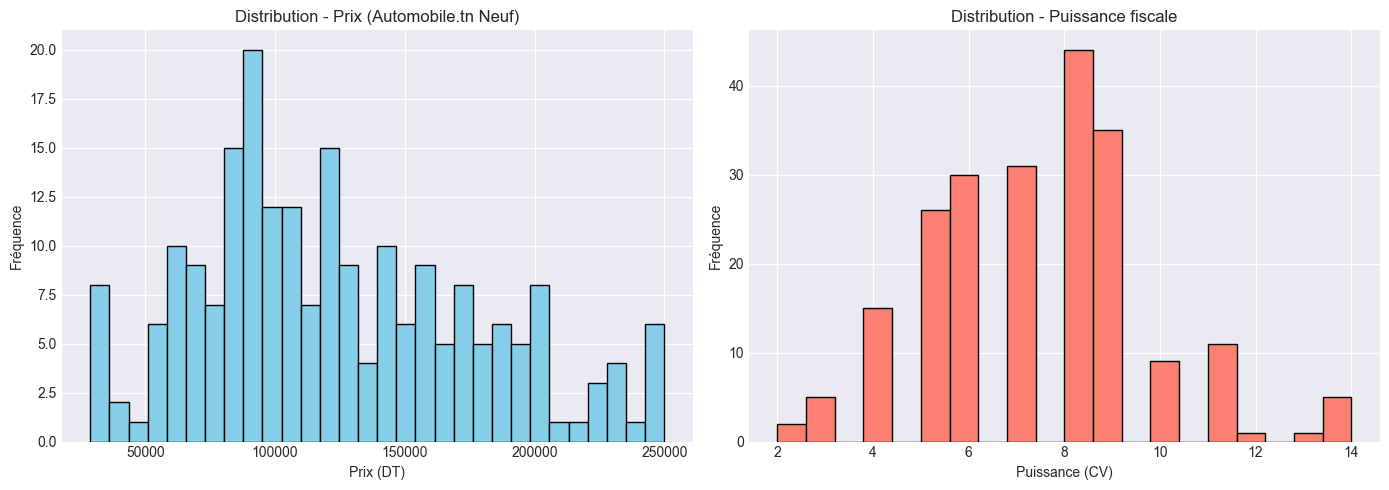

In [21]:
# Visualisation des distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prix
df_clean['Prix_Numeric'].hist(bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution - Prix (Automobile.tn Neuf)')
axes[0].set_xlabel('Prix (DT)')
axes[0].set_ylabel('Fréquence')

# Puissance
df_clean['Puissance_Numeric'].hist(bins=20, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Distribution - Puissance fiscale')
axes[1].set_xlabel('Puissance (CV)')
axes[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## 15. Détection et traitement des outliers

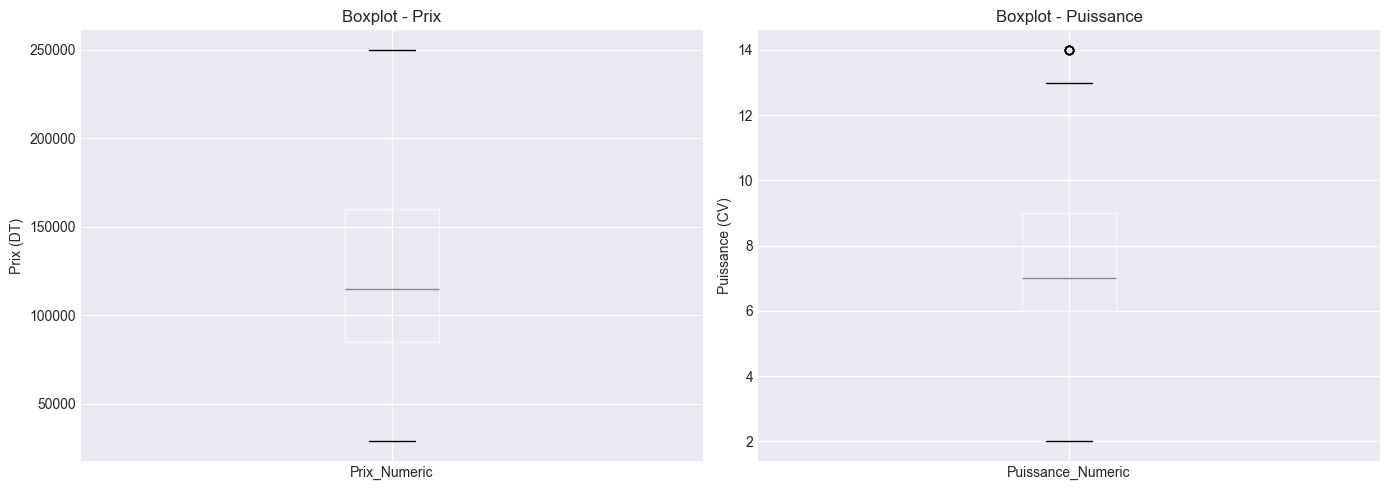

In [22]:
# Boxplots pour identifier les outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clean.boxplot(column='Prix_Numeric', ax=axes[0])
axes[0].set_title('Boxplot - Prix')
axes[0].set_ylabel('Prix (DT)')

df_clean.boxplot(column='Puissance_Numeric', ax=axes[1])
axes[1].set_title('Boxplot - Puissance')
axes[1].set_ylabel('Puissance (CV)')

plt.tight_layout()
plt.show()

## 16. Sélection et réorganisation des colonnes finales

In [23]:
# Sélectionner les colonnes finales dans l'ordre spécifique pour compatibilité
final_columns = [
    'Prix_Numeric',
    'Marque',
    'Modele',
    'Année',
    'Age',
    'Kilométrage',
    'Énergie',
    'Boîte_Vitesses',
    'Puissance_Numeric'
]

df_final = df_clean[final_columns].copy()

# Renommer les colonnes pour compatibilité
df_final.columns = [
    'Prix',
    'Marque',
    'Modele',
    'Annee',
    'Age',
    'Kilometrage',
    'Energie',
    'Boite_Vitesses',
    'Puissance_Fiscale'
]

print("Dataset final - Automobile.tn Neuf:")
print(df_final.head())

Dataset final - Automobile.tn Neuf:
       Prix Marque                             Modele  Annee  Age  Kilometrage  Energie Boite_Vitesses  Puissance_Fiscale
0   66980.0  SKODA      SKODA FABIA 1.0 L MPI Essence   2025    0            0  Essence       Manuelle                4.0
1   78980.0  SKODA      SKODA KUSHAQ 1.0 TSI Ambition   2025    0            0  Essence       Manuelle                6.0
2   86980.0  SKODA  SKODA SCALA 1.0 L TSI Essence DSG   2025    0            0  Essence    Automatique                6.0
3   89980.0  SKODA  SKODA KAMIQ 1.0 L TSI Essence DSG   2025    0            0  Essence    Automatique                6.0
4  114980.0  SKODA  SKODA OCTAVIA 1.4 TSI Essence BVA   2025    0            0  Essence    Automatique                8.0


## 17. Statistiques finales

In [24]:
# Statistiques finales
print("\n" + "="*60)
print("RÉSUMÉ FINAL - AUTOMOBILE.TN NEUF")
print("="*60)
print(f"Nombre total de voitures: {len(df_final)}")
print(f"Nombre de colonnes: {len(df_final.columns)}")
print(f"\nNombre de marques uniques: {df_final['Marque'].nunique()}")
print(f"Nombre de types d'énergie: {df_final['Energie'].nunique()}")
print(f"Nombre de types de boîte: {df_final['Boite_Vitesses'].nunique()}")
print(f"\nPlage de prix: {df_final['Prix'].min():.0f} - {df_final['Prix'].max():.0f} DT")
print(f"Année (toutes neuves): {df_final['Annee'].unique()}")
print(f"Kilométrage (toutes neuves): {df_final['Kilometrage'].unique()}")
print(f"Age (toutes neuves): {df_final['Age'].unique()}")
print(f"\nValeurs manquantes totales: {df_final.isna().sum().sum()}")


RÉSUMÉ FINAL - AUTOMOBILE.TN NEUF
Nombre total de voitures: 215
Nombre de colonnes: 9

Nombre de marques uniques: 43
Nombre de types d'énergie: 4
Nombre de types de boîte: 3

Plage de prix: 28700 - 249980 DT
Année (toutes neuves): [2025]
Kilométrage (toutes neuves): [0]
Age (toutes neuves): [0]

Valeurs manquantes totales: 0


## 18. Sauvegarde du dataset nettoyé

In [25]:
# Créer le dossier de sortie
output_dir = '../Data/cleaned/'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le dataset nettoyé
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_filename = os.path.join(output_dir, f'automobile_tn_neuf_cleaned_{timestamp}.csv')
excel_filename = os.path.join(output_dir, f'automobile_tn_neuf_cleaned_{timestamp}.xlsx')

df_final.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"✓ Données sauvegardées: {csv_filename}")

try:
    df_final.to_excel(excel_filename, index=False, engine='openpyxl')
    print(f"✓ Données sauvegardées: {excel_filename}")
except:
    print("⚠️ Excel non sauvegardé (openpyxl non installé)")

✓ Données sauvegardées: ../Data/cleaned/automobile_tn_neuf_cleaned_20251130_160239.csv
✓ Données sauvegardées: ../Data/cleaned/automobile_tn_neuf_cleaned_20251130_160239.xlsx
✓ Données sauvegardées: ../Data/cleaned/automobile_tn_neuf_cleaned_20251130_160239.xlsx


In [26]:
print("\n🎉 Nettoyage Automobile.tn Neuf terminé avec succès!")


🎉 Nettoyage Automobile.tn Neuf terminé avec succès!
